In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from utils import *
from pylops.basicoperators import *

In [3]:
moomba_test_path = '../data/test_cubes/moomba_test_1.npy'
Unet_pred_path = './Unet/Unet_pred_Full_random_75.npy'
UFNO_pred_path = '../notebook/results/ufno_pred_moomba_ratio0.75_frandom.npy'
label = np.load(f'{moomba_test_path}')
Unet_pred = np.load(f'{Unet_pred_path}')
UFNO_pred = np.load(f'{UFNO_pred_path}')
Convention_pred = np.copy(Unet_pred)

In [4]:
[in1, in2, in3] = label.shape
# the ratio of missing trace equal to 1-ratio
ratio = 0.25

## build the input data
[in1, in2, in3] = label.shape
## generate random mask
iava, iavarec = irregular2(in1, in2, in3, perc_sub=ratio, seed=10)
# Create restriction operator
Rop = Restriction(dims=in1*in2*in3, iava=iava, dtype='float64')
datamasked = Rop.H*Rop*label.ravel()
mask = Rop.H*Rop*np.ones_like(label).ravel()
mask = mask.reshape(in1, in2, in3)
frand_mask_cube = label.T*mask
test_data = frand_mask_cube.T

In [12]:
# Define spatial parameters
deltaz = 0.004
deltax = deltay = 1
zmin = xmin = ymin = 0

cube_shape = label.shape
xmax = cube_shape[0] * deltax
ymax = cube_shape[1] * deltay
zmax = cube_shape[2] * deltaz

# Generate coordinate arrays
x = np.linspace(xmin, xmax, cube_shape[0], endpoint=True)
y = np.linspace(ymin, ymax, cube_shape[1], endpoint=True)
z = np.linspace(zmin, zmax, cube_shape[2], endpoint=True)
print(X.shape)

# Create meshgrid
Z, X, Y = np.meshgrid(z, x, y, indexing='ij')

(128, 128, 128)


In [6]:
import pyortho as lo #lo: local orthogonalization

## prepare paramters for ortho
rect=[10,10,10];
eps=0;
niter=20;
verb=1;


simi_unet=lo.localsimic(label,label-Unet_pred,[5,5,5],niter,eps,verb);
simi_ufno=lo.localsimic(label,label-UFNO_pred,[5,5,5],niter,eps,verb);
simi_convention=lo.localsimic(label,label-Convention_pred,[5,5,5],niter,eps,verb);

128 128 128 5 5 5 20 0 1
128 128 128 5 5 5 20 0 1
128 128 128 5 5 5 20 0 1
n1=128,n2=128,n3=128,r1=5,r2=5,r3=5
niter=20,eps=0,verb=1
dim=3,dim1=2
nd=2097152
iteration 0 res: 0.997769 grad: 0.000000
iteration 1 res: 0.958936 grad: 1.249069
iteration 2 res: 0.941920 grad: 0.312904
iteration 3 res: 0.929607 grad: 0.113029
iteration 4 res: 0.924204 grad: 0.040888
iteration 5 res: 0.921834 grad: 0.012771
iteration 6 res: 0.920864 grad: 0.005338
iteration 7 res: 0.920654 grad: 0.002609
iteration 8 res: 0.920678 grad: 0.001230
iteration 9 res: 0.920816 grad: 0.000703
iteration 10 res: 0.920923 grad: 0.000319
iteration 11 res: 0.921019 grad: 0.000105
iteration 12 res: 0.921049 grad: 0.000136
iteration 13 res: 0.921061 grad: 0.000033
iteration 14 res: 0.921068 grad: 0.000013
iteration 15 res: 0.921065 grad: 0.000005
iteration 16 res: 0.921055 grad: 0.000002
convergence in 17 iterations, alpha=0.335909, gd=6.38899e-07 
iteration 0 res: 0.997915 grad: 0.000000
iteration 1 res: 0.948924 grad: 0.44

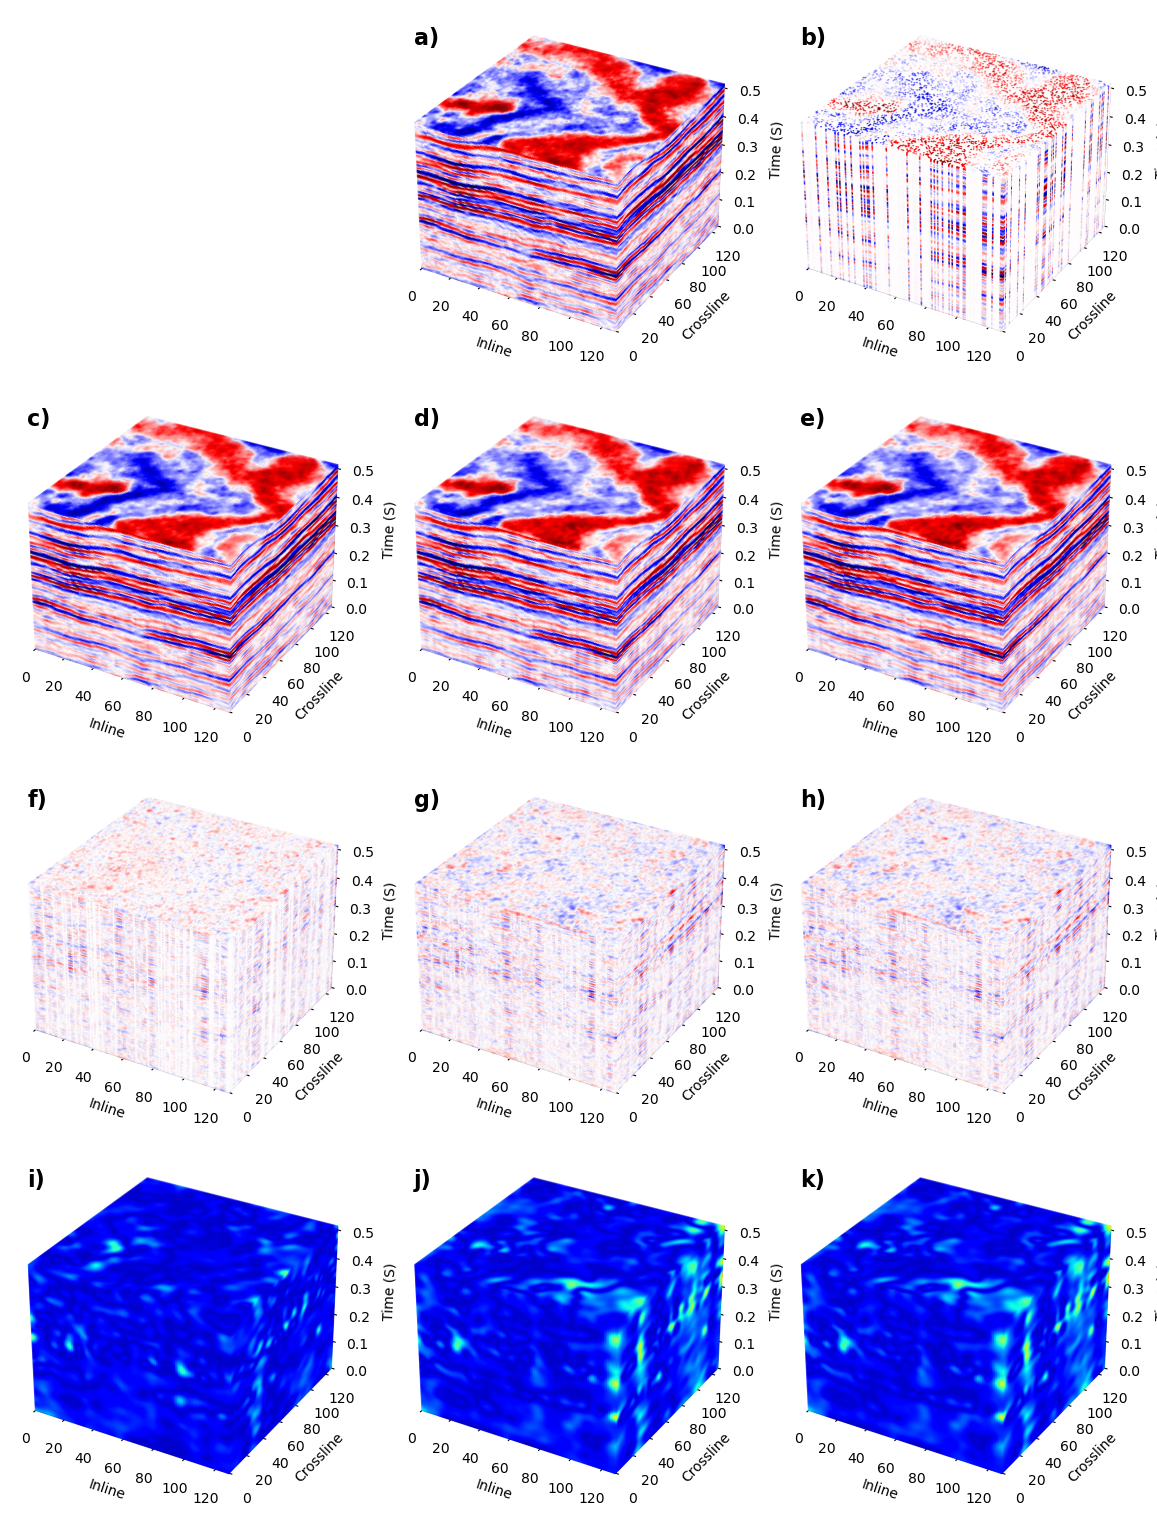

In [22]:
# Data for visualization
data = [
    label, test_data, UFNO_pred, Unet_pred, Convention_pred,
    (label - UFNO_pred), (label - Unet_pred), (label - Convention_pred), simi_ufno, simi_unet,  simi_convention
]
titles = [
    'Ground Truth', 'Incomlete Data', 'UFNO Prediction', 'Unet Prediction',
    'Conventional Prediction', 'UFNO Error', 'Unet Error', 'Conventional Error', 'Simi UFNO', 'Simi Unet', 'Simi Conventional'
]

# Create figure with smaller size
fig = plt.figure(figsize=(12, 15))

# Create subplots with scatter plotting
for i in range(11):
    ax = fig.add_subplot(4, 3, i + 2, projection='3d')
    # Downsample heavily for speed (every 20th point)
    step = 1
    idx = np.arange(0, data[i].size, step)
    # Use jet colormap with vmin=0, vmax=1 for last three subplots
    if i >= 8:  # Last three subplots (Simi UFNO, Simi Unet, Simi Conventional)
        ax.scatter(
            X.flatten()[idx], Y.flatten()[idx], Z.flatten()[idx],
            c=data[i].flatten()[idx], cmap='jet', vmin=0, vmax=1, s=0.5
        )
    else:
        ax.scatter(
            X.flatten()[idx], Y.flatten()[idx], Z.flatten()[idx],
            c=data[i].flatten()[idx], cmap='seismic', vmin=-5, vmax=5, s=0.5
        )
    ax.set_xlabel('Inline')
    ax.set_ylabel('Crossline')
    ax.set_zlabel('Time (S)')
    ax.invert_zaxis()
    ax.grid(False)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    # ax.set_title(titles[i], fontsize=12)
    ax.text2D(0.05, 0.95, f"{chr(97 + i)})", transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_zlim(zmin, zmax)

# Adjust layout
fig.subplots_adjust(left=0.0, right=0.96, top=1, bottom=0.01, wspace=0.02, hspace=0.11)

# Save figure
plt.savefig('3d_seismic_visualization_1.png', dpi=300)
# plt.savefig('3d_seismic_visualization_1.pdf', dpi=300)

plt.show()

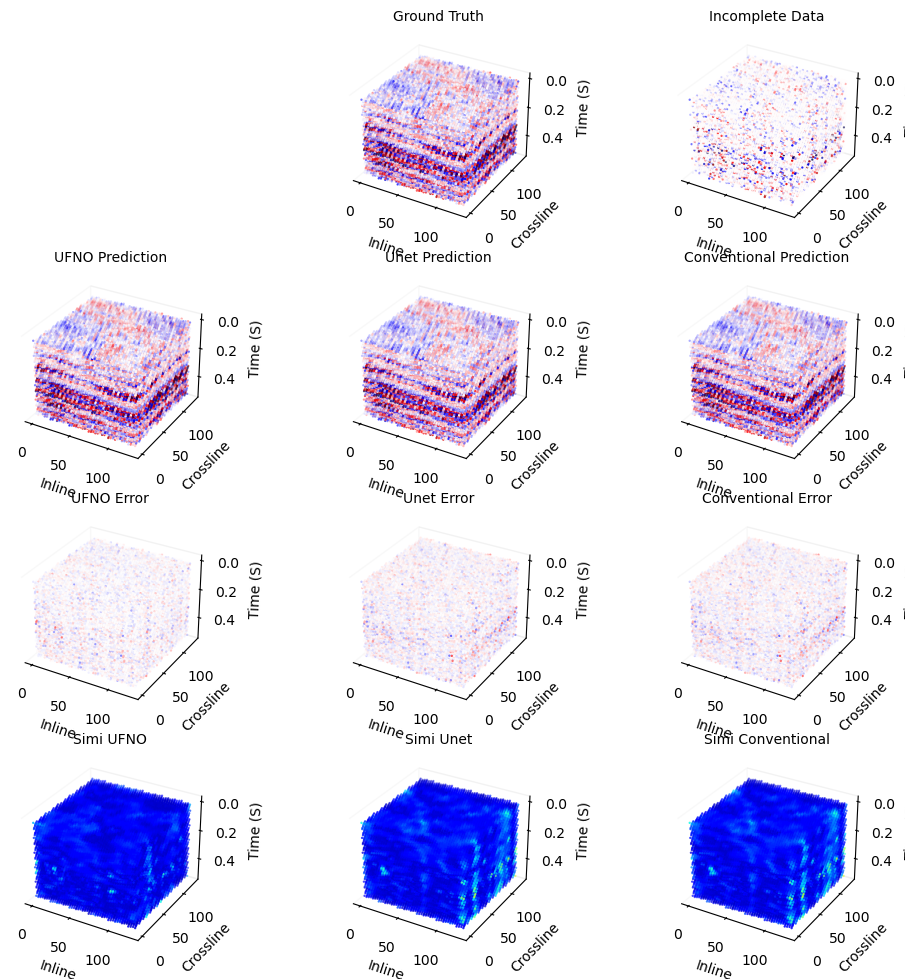

In [9]:
# Data for visualization
data = [
    label, test_data, UFNO_pred, Unet_pred, Convention_pred,
    (label - UFNO_pred), (label - Unet_pred), (label - Convention_pred),
    simi_ufno, simi_unet, simi_convention
]
titles = [
    'Ground Truth', 'Incomplete Data', 'UFNO Prediction', 'Unet Prediction',
    'Conventional Prediction', 'UFNO Error', 'Unet Error', 'Conventional Error',
    'Simi UFNO', 'Simi Unet', 'Simi Conventional'
]

# Create figure
fig = plt.figure(figsize=(12, 12))

# Create subplots with scatter plotting
seismic_sc = None
simi_sc = None
for i in range(11):
    ax = fig.add_subplot(4, 3, i + 2, projection='3d')
    # Downsample for speed (every 10th point)
    step = 25
    idx = np.arange(0, data[i].size, step)
    # Scatter plot with appropriate colormap
    if i >= 8:  # Last three subplots (Simi UFNO, Simi Unet, Simi Conventional)
        sc = ax.scatter(
            X.flatten()[idx], Y.flatten()[idx], Z.flatten()[idx],
            c=data[i].flatten()[idx], cmap='jet', vmin=0, vmax=1, s=0.5
        )
        if i == 8:  # Store scatter object for similarity colorbar
            simi_sc = sc
    else:
        sc = ax.scatter(
            X.flatten()[idx], Y.flatten()[idx], Z.flatten()[idx],
            c=data[i].flatten()[idx], cmap='seismic', vmin=-5, vmax=5, s=0.5
        )
        if i == 0:  # Store scatter object for seismic colorbar
            seismic_sc = sc
    ax.set_xlabel('Inline')
    ax.set_ylabel('Crossline')
    ax.set_zlabel('Time (S)')
    ax.set_title(titles[i], fontsize=10)
    ax.invert_zaxis()
    # Remove grid/mesh
    ax.grid(False)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

# # Add colorbar for seismic data
# cbar_seismic = fig.colorbar(seismic_sc, ax=fig.get_axes(), location='right', shrink=0.2, pad=0.05)
# cbar_seismic.set_label('Amplitude', fontsize=10)

# # Add colorbar for similarity data
# cbar_simi = fig.colorbar(simi_sc, ax=fig.get_axes(), location='bottom', shrink=0.2, pad=0.05)
# cbar_simi.set_label('Similarity', fontsize=10)

# Adjust layout
# plt.tight_layout()


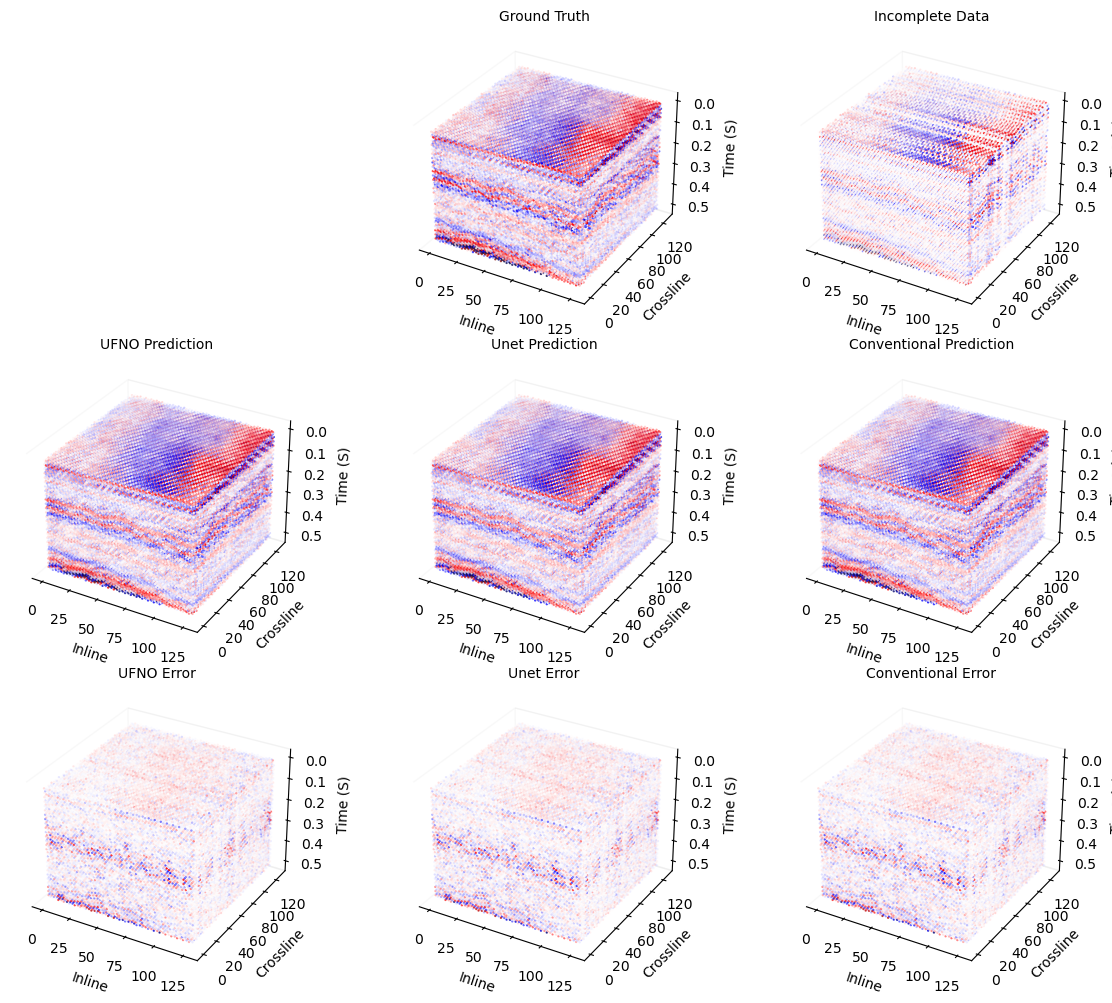

In [6]:
# Data for visualization
data = [
    label, test_data, UFNO_pred, Unet_pred, Convention_pred,
    (label - UFNO_pred), (label - Unet_pred), (label - Convention_pred)
]
titles = [
    'Ground Truth', 'Incomplete Data', 'UFNO Prediction', 'Unet Prediction',
    'Conventional Prediction', 'UFNO Error', 'Unet Error', 'Conventional Error'
]

# Create figure
fig = plt.figure(figsize=(12, 10))

# Create subplots with scatter plotting
for i in range(8):
    ax = fig.add_subplot(3, 3, i + 2, projection='3d')
    # Downsample for speed (every 10th point for balance)
    step = 10
    idx = np.arange(0, data[i].size, step)
    ax.scatter(
        X.flatten()[idx], Y.flatten()[idx], Z.flatten()[idx],
        c=data[i].flatten()[idx], cmap='seismic', vmin=-5, vmax=5, s=0.5
    )
    ax.set_xlabel('Inline')
    ax.set_ylabel('Crossline')
    ax.set_zlabel('Time (S)')
    ax.set_title(titles[i], fontsize=10)
    ax.invert_zaxis()
    # Remove grid/mesh
    ax.grid(False)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

# Adjust layout
plt.tight_layout()
